## SORTS (comparisons)

In [576]:
import math
import random

random.seed(42)

### Insertion sort

In [577]:
def insertion_sort(A):
    comparisons = 0
    for i in range(1, len(A)):
        key = A[i]
        j = i - 1
        comparisons += 1
        while j >= 0 and A[j] > key:
            comparisons += 1
            A[j + 1] = A[j]
            j -= 1
        A[j + 1] = key
    return comparisons

### Selection sort

In [578]:
def selection_sort(A):
    comparisons = 0
    n = len(A)
    for i in range(n - 1):
        min_index = i
        for j in range(i + 1, n):
            comparisons += 1
            if A[j] < A[min_index]:
                min_index = j
        A[i], A[min_index] = A[min_index], A[i]
    return comparisons

### Merge sort

In [579]:
def merge_sort(A):
    if len(A) <= 1:
        return 0
    mid = len(A) // 2
    left = A[:mid]
    right = A[mid:]

    # Recursive call on each half
    comparecount = merge_sort(left) + merge_sort(right)

    # Two iterators for traversing the two halves
    i = 0
    j = 0
    
    # Iterator for the main list
    k = 0
    
    while i < len(left) and j < len(right):
        comparecount += 1
        if left[i] <= right[j]:
            # The value from the left half has been used
            A[k] = left[i]
            # Move the iterator forward
            i += 1
        else:
            A[k] = right[j]
            j += 1
        # Move to the next slot
        k += 1

    # For all the remaining values
    while i < len(left):
        comparecount += 1
        A[k] = left[i]
        i += 1
        k += 1

    while j < len(right):
        comparecount += 1
        A[k]=right[j]
        j += 1
        k += 1

    return comparecount

### Heap sort

In [580]:
def heapify(A, n, i, comparisons):
    largest = i
    l = 2 * i + 1
    r = 2 * i + 2

    if l < n and A[l] > A[largest]:
        largest = l
        comparisons[0] += 1

    if r < n and A[r] > A[largest]:
        largest = r
        comparisons[0] += 1

    if largest != i:
        A[i], A[largest] = A[largest], A[i]
        heapify(A, n, largest, comparisons)

def heap_sort(A):
    comparisons = [0]
    n = len(A)

    for i in range(n // 2 - 1, -1, -1):
        heapify(A, n, i, comparisons)

    for i in range(n - 1, 0, -1):
        A[i], A[0] = A[0], A[i]
        heapify(A, i, 0, comparisons)

    return comparisons[0]

### Quick sort

In [581]:
def quicksort(A):
    comparisons = [0]
    quickSorter(A, 0, len(A) - 1, comparisons)
    return comparisons[0]

def partition(A, low, high, comparisons):
    pivot = A[high]
    i = low - 1
    for j in range(low, high):
        comparisons[0] += 1
        if A[j] <= pivot:
            i += 1
            A[i], A[j] = A[j], A[i]
    A[i + 1], A[high] = A[high], A[i + 1]
    return i + 1

def quickSorter(A, low, high, comparisons):
    if low < high:
        pi = partition(A, low, high, comparisons)
        quickSorter(A, low, pi - 1, comparisons)
        quickSorter(A, pi + 1, high, comparisons)

### Timsort

In [582]:
MINIMUM = 32

def find_minrun(n): 
    r = 0
    while n >= MINIMUM: 
        r |= n & 1
        n >>= 1
    return n + r 

def tim_insertion_sort(array, left, right): 
    global comparisons
    for i in range(left + 1, right + 1):
        key = array[i]
        j = i - 1
        comparisons += 1
        while j >= left and key < array[j]:
            array[j + 1] = array[j]
            j -= 1
            comparisons += 1
        array[j + 1] = key
    return array
              
def tim_merge(array, l, m, r): 
    global comparisons
    array_length1 = m - l + 1
    array_length2 = r - m 
    left = []
    right = []
    for i in range(array_length1): 
        left.append(array[l + i]) 
    for i in range(array_length2): 
        right.append(array[m + 1 + i]) 
  
    i = 0
    j = 0
    k = l
   
    while j < array_length2 and i < array_length1: 
        if left[i] <= right[j]: 
            array[k] = left[i] 
            i += 1
        else: 
            array[k] = right[j] 
            j += 1
        k += 1
        comparisons += 1
  
    while i < array_length1: 
        array[k] = left[i] 
        k += 1
        i += 1
        comparisons += 1
  
    while j < array_length2: 
        array[k] = right[j] 
        k += 1
        j += 1
        comparisons += 1
  
def timsort(array): 
    n = len(array) 
    minrun = find_minrun(n) 
  
    for start in range(0, n, minrun): 
        end = min(start + minrun - 1, n - 1) 
        tim_insertion_sort(array, start, end) 
   
    size = minrun 
    while size < n: 
        for left in range(0, n, 2 * size): 
            mid = min(n - 1, left + size - 1) 
            right = min((left + 2 * size - 1), (n - 1)) 
            tim_merge(array, left, mid, right) 
        size = 2 * size

    return comparisons

### Introsort

In [583]:
def introsort(arr):

    def partition(arr, low, high):
        pivot = arr[high]
        i = low - 1
        for j in range(low, high):
            comparisons[0] += 1
            if arr[j] <= pivot:
                i += 1
                arr[i], arr[j] = arr[j], arr[i]
        arr[i + 1], arr[high] = arr[high], arr[i + 1]
        return i + 1

    def insertion_sort(arr, low, high):
        for i in range(low + 1, high + 1):
            key = arr[i]
            j = i - 1
            comparisons[0] += 1
            while j >= low and arr[j] > key:
                comparisons[0] += 1
                arr[j + 1] = arr[j]
                j -= 1
            arr[j + 1] = key

    def heap_sort(arr):
        def heapify(arr, n, i):
            largest = i
            l = 2 * i + 1
            r = 2 * i + 2

            if l < n and arr[i] < arr[l]:
                largest = l

            if r < n and arr[largest] < arr[r]:
                largest = r

            if largest != i:
                arr[i], arr[largest] = arr[largest], arr[i]
                heapify(arr, n, largest)

        n = len(arr)

        for i in range(n // 2 - 1, -1, -1):
            heapify(arr, n, i)

        for i in range(n - 1, 0, -1):
            arr[i], arr[0] = arr[0], arr[i]
            heapify(arr, i, 0)

    def introsort_util(arr, low, high, depth_limit):
        size = high - low + 1

        if size < 16:
            insertion_sort(arr, low, high)
            return

        if depth_limit == 0:
            heap_sort(arr)
            return

        pivot = partition(arr, low, high)

        introsort_util(arr, low, pivot - 1, depth_limit - 1)
        introsort_util(arr, pivot + 1, high, depth_limit - 1)

    comparisons = [0]
    introsort_util(arr, 0, len(arr) - 1, 2 * math.log(len(arr)))
    return comparisons[0]

## PRESORTEDNESS

### Number of Runs
The number of runs, is the number of increasing sequences in an array minus one.

In [584]:
def runs(arr):
    count = 0

    for key in range(1,len(arr)):
        if arr[key] < arr[key-1]:
            count += 1

    return count

arr = [3, 4, 4, 7]
print(runs(arr))

0


### Number of Deletions
minimum number of elements that need to be removed from array to obtain a sorted sequence.

In [585]:
def deletions(arr):
    def ceil_index(sub, val):
        l, r = 0, len(sub)-1
        while l <= r:
            mid = (l + r) // 2
            if sub[mid] >= val:
                r = mid - 1
            else:
                l = mid + 1
        return l
 
    sub = [arr[0]]
    for i in range(1, len(arr)):
        if arr[i] >= sub[-1]:
            sub.append(arr[i])
        else:
            sub[ceil_index(sub, arr[i])] = arr[i]
 
    return len(arr) - len(sub)

arr = [3, 4, 5, 7]
print(deletions(arr))

0


### Number of Inversions
The number of inversion in an array, is the number of pairs j < key such that arr[j] > key.

In [586]:
def inversions(arr):
    count = 0

    for key in range(len(arr)):
        for j in range(key):
            if arr[key] < arr[j]:
                count += 1

    return count

arr = [3, 4, 4, 7]
print(inversions(arr))

0


## Setup and Datasets import/cleaning

In [587]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
os.getcwd()

dataset_directory = './kaggledatasets'
dataset_dfs = {}

# import files in the directory
for file_name in os.listdir(dataset_directory):
    try:
        dataset_name = os.path.splitext(file_name)[0]
        dataset_dfs[dataset_name] = pd.read_csv(os.path.join(dataset_directory, file_name))
    except pd.errors.ParserError as e:
        print(f"Error reading file '{file_name}': {e}")
        continue

print("amount of dataframes imported:")
print(len(dataset_dfs))

ARRAY_SIZE = 40

for key, df in dataset_dfs.items():
    for column in df.columns:
        if not df[column].apply(lambda x: isinstance(x, (int, float))).all():
            df.drop(column, axis=1, inplace=True)
            
    dataset_dfs[key] = df.dropna().head(ARRAY_SIZE)


Error reading file 'chord-fingers.csv': Error tokenizing data. C error: Expected 10 fields in line 7, saw 11

amount of dataframes imported:
51


## Sorting and training set creation

In [588]:
results = []

for key, df in dataset_dfs.items():
    for column in df.columns:
        arr = df[column].values
        if len(arr) == 0:
            continue
        runs_val = runs(arr)
        inversions_val = inversions(arr)
        deletions_val = deletions(arr)
        comp_merge = merge_sort(arr.copy())
        comp_selection = selection_sort(arr.copy())
        comp_quick = quicksort(arr.copy())
        comp_intro = introsort(arr.copy())
        comp_insertion = insertion_sort(arr.copy())
        global comparisons
        comparisons = 0
        comp_tim = timsort(arr.copy())
        comparisons = 0
        comp_heap = heap_sort(arr.copy())
        
        comparison_counts = {
            'introsort': comp_intro,
            'insertion_sort': comp_insertion,
            'merge_sort': comp_merge,
            'timsort': comp_tim,
            'quick_sort': comp_quick,
            'selection_sort': comp_selection,
            #'heap_sort': comp_heap, this is bugged (sometimes outputs 0)
        }

        min_algorithm = min(comparison_counts, key=comparison_counts.get)
        min_comparisons = comparison_counts[min_algorithm]

        results.append({
            'Dataset': key,
            'Column': column,
            'Algorithm': min_algorithm,
            'Comparisons': min_comparisons,
            'Runs': runs_val,
            'Inversions': inversions_val,
            'Deletions': deletions_val,
            'introsort': comp_intro,
            'insertion_sort': comp_insertion,
            'merge_sort': comp_merge,
            'timsort': comp_tim,
            'heap_sort': comp_heap,
            'quick_sort': comp_quick,
            'selection_sort': comp_selection,

        })

df_results = pd.DataFrame(results)
print(df_results)

                      Dataset            Column       Algorithm  Comparisons  \
0               538ratingsMen            Season  insertion_sort           39   
1               538ratingsMen            TeamID      quick_sort          199   
2               538ratingsMen         538rating      merge_sort          216   
3             538ratingsWomen            Season  insertion_sort           39   
4             538ratingsWomen            TeamID      quick_sort          207   
..                        ...               ...             ...          ...   
256                 wines_SPA           acidity         timsort          111   
257                  Youtuber              Rank  insertion_sort           39   
258  yt_sports_channels_stats       video_count      quick_sort          163   
259  yt_sports_channels_stats        view_count      quick_sort          169   
260  yt_sports_channels_stats  subscriber_count      quick_sort          183   

     Runs  Inversions  Deletions  intro

## Neural network model

In [589]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

X = df_results[['Runs',  'Inversions', 'Deletions']]
y = df_results['Algorithm']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

train_indices = X_train.index
test_indices = X_test.index

# indices split
print(train_indices,test_indices)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# neural network model
model = Sequential()
model.add(Dense(32, input_dim=3, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(len(label_encoder.classes_), activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=500, batch_size=64, verbose=1)

Index([212,  66,  16,  55, 250,  86, 227, 150, 183,  38,
       ...
        74, 214, 210, 121, 260,  20, 188,  71, 106, 102],
      dtype='int64', length=208) Index([ 30, 143, 170,  73, 159, 252, 190, 104,   9, 186,  24, 109,  96, 205,
       239, 136,  77,   6, 208, 180,  45, 120,  19,  60, 259, 139, 224,  46,
       158,  15, 237, 229, 177,  33, 132, 126, 173,  10, 114,  97, 113, 213,
        25, 221, 167,  18,  84, 140,  79, 168, 111, 195, 178],
      dtype='int64')
Epoch 1/500


c:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1341 - loss: 1.6218
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3421 - loss: 1.5684 
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5282 - loss: 1.5315 
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5359 - loss: 1.4795 
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5698 - loss: 1.4124 
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5511 - loss: 1.3655 
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5733 - loss: 1.2824 
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6105 - loss: 1.2102 
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6183 - loss: 1.1205 
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5825 - loss: 1.0920 
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6325 - loss: 1.0023 
Epoch 12/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6143 - loss: 1.0102 
Ep

## Results

In [590]:
# Make predictions on the test data and compare them to the True best Algorithm
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)
predicted_algorithms = label_encoder.inverse_transform(y_pred_classes)
true_algorithms = label_encoder.inverse_transform(y_test)

comparison_df = pd.DataFrame({'Predicted Algorithm': predicted_algorithms, 'True Algorithm': true_algorithms})
print(comparison_df)

accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)[1]
print("Accuracy:", accuracy)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
   Predicted Algorithm  True Algorithm
0           quick_sort      quick_sort
1       insertion_sort         timsort
2           quick_sort      quick_sort
3       insertion_sort  insertion_sort
4              timsort         timsort
5              timsort         timsort
6           quick_sort      quick_sort
7           merge_sort       introsort
8           quick_sort      quick_sort
9              timsort      merge_sort
10             timsort         timsort
11      insertion_sort         timsort
12             timsort         timsort
13          merge_sort       introsort
14          quick_sort      quick_sort
15      insertion_sort  insertion_sort
16          merge_sort      quick_sort
17      insertion_sort  insertion_sort
18          quick_sort       introsort
19          quick_sort      merge_sort
20      insertion_sort         timsort
21      insertion_sort  insertion_sort
22          quick_sort      quick_sort
23          quick_sort    

### Average Comparisons

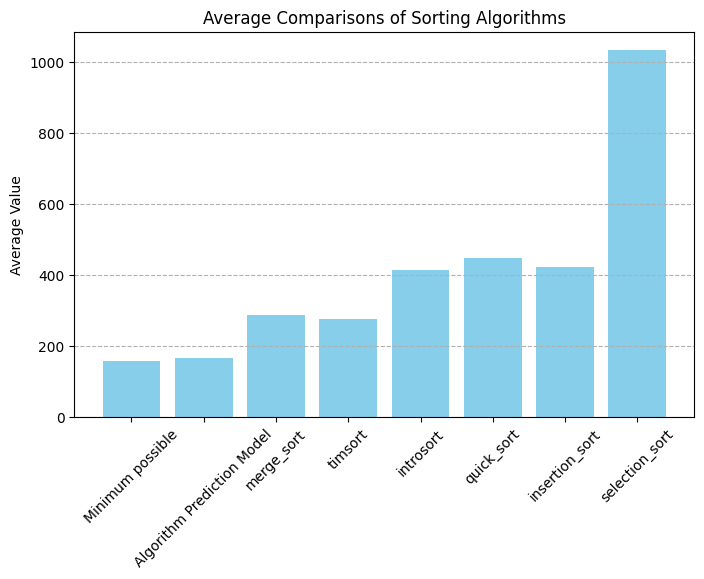

min possible:  155.8
algorithm predicting model:  164.9
merge_sort:  286.2
timsort:  274.8
introsort:  414.5
quick_sort:  447.2
insertion_sort:  420.9
selection_sort:  1033.5


In [591]:
test_set_df = df_results.iloc[test_indices]
test_set_df.reset_index(drop=True, inplace=True)

c = []
t = []

for index, row in test_set_df.iterrows():
    c.append(row[predicted_algorithms[index]])
    t.append(row[true_algorithms[index]])

def calculate_average(column_name):
    return round(np.sum(test_set_df[column_name]) / len(df), 1)

minimum_possible = round(np.sum(t)/len(test_set_df), 1)
algorithm_prediction_model = round(np.sum(c)/len(test_set_df), 1)
merge_sort_avg = calculate_average('merge_sort')
timsort_avg = calculate_average('timsort')
introsort_avg = calculate_average('introsort')
quick_sort_avg = calculate_average('quick_sort')
insertion_sort_avg = calculate_average('insertion_sort')
selection_sort_avg = calculate_average('selection_sort')

data = {
    'Algorithm': ['Minimum possible', 'Algorithm Prediction Model', 'merge_sort', 'timsort', 'introsort', 'quick_sort', 'insertion_sort', 'selection_sort'],
    'Average Value': [minimum_possible, algorithm_prediction_model, merge_sort_avg, timsort_avg, introsort_avg, quick_sort_avg, insertion_sort_avg, selection_sort_avg]
}
df_average_comp = pd.DataFrame(data)

# Plot
plt.figure(figsize=(8, 5))
plt.bar(df_average_comp['Algorithm'], df_average_comp['Average Value'], color='skyblue')
plt.title('Average Comparisons of Sorting Algorithms')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

print('min possible: ', minimum_possible)
print('algorithm predicting model: ', algorithm_prediction_model)
print('merge_sort: ', merge_sort_avg)
print('timsort: ', timsort_avg)
print('introsort: ', introsort_avg)
print('quick_sort: ', quick_sort_avg)
print('insertion_sort: ', insertion_sort_avg)
print('selection_sort: ', selection_sort_avg)

### Model analysis

In [592]:
from itertools import product

# Generate arrays with combinations of values
def generate_arrays(values, n):
    return [list(comb) for comb in product(values, repeat=n)]

possible_values = [100, 25, 10, 5, 0]
X_analysis = generate_arrays(possible_values, 3)

X_analysis_scaled = scaler.fit_transform(X_analysis)

y_preds = model.predict(X_analysis_scaled)
y_preds_classes = np.argmax(y_preds, axis=1)
predicted_algorithm = label_encoder.inverse_transform(y_preds_classes)

print(predicted_algorithm)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
['merge_sort' 'merge_sort' 'merge_sort' 'merge_sort' 'merge_sort'
 'introsort' 'timsort' 'timsort' 'timsort' 'timsort' 'introsort'
 'quick_sort' 'timsort' 'timsort' 'timsort' 'introsort' 'quick_sort'
 'timsort' 'timsort' 'timsort' 'introsort' 'quick_sort' 'timsort'
 'timsort' 'timsort' 'merge_sort' 'timsort' 'timsort' 'timsort' 'timsort'
 'introsort' 'timsort' 'introsort' 'introsort' 'introsort' 'introsort'
 'timsort' 'timsort' 'timsort' 'timsort' 'introsort' 'timsort' 'timsort'
 'timsort' 'timsort' 'introsort' 'insertion_sort' 'timsort' 'timsort'
 'timsort' 'merge_sort' 'timsort' 'timsort' 'timsort' 'timsort'
 'introsort' 'timsort' 'timsort' 'timsort' 'timsort' 'introsort' 'timsort'
 'timsort' 'timsort' 'timsort' 'introsort' 'timsort' 'insertion_sort'
 'timsort' 'timsort' 'introsort' 'timsort' 'insertion_sort'
 'insertion_sort' 'insertion_sort' 'merge_sort' 'timsort' 'timsort'
 'timsort' 'timsort' 'introsort' 'timsort' 'timsort' 'timsort' 'timsort